# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [1]:
#Libaries to import: 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


In [2]:
boston = pd.read_csv('/Users/bert/Desktop/dataV2-labs/module-3/Problems-in-ML/data/boston_data.csv')
#boston.shape --> 404 rows, 14 columns.
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [3]:
boston.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.194770,0.404249,-0.060688,0.405290,-0.172226,0.349288,-0.376493,0.603044,0.565047,0.292092,-0.377436,0.428940,-0.400956
zn,-0.194770,1.000000,-0.532268,-0.037290,-0.497114,0.302404,-0.546587,0.659018,-0.311313,-0.289332,-0.371315,0.176350,-0.412075,0.355608
indus,0.404249,-0.532268,1.000000,0.059928,0.760913,-0.353589,0.630048,-0.702583,0.616375,0.722828,0.356549,-0.378189,0.608309,-0.501698
chas,-0.060688,-0.037290,0.059928,1.000000,0.100650,0.090146,0.084852,-0.103124,-0.022561,-0.043708,-0.121835,0.042580,-0.041061,0.141400
nox,0.405290,-0.497114,0.760913,0.100650,1.000000,-0.266114,0.728882,-0.762469,0.612115,0.660607,0.166715,-0.393876,0.587573,-0.439225
rm,-0.172226,0.302404,-0.353589,0.090146,-0.266114,1.000000,-0.210589,0.178700,-0.173222,-0.241733,-0.323330,0.128410,-0.578025,0.683541
age,0.349288,-0.546587,0.630048,0.084852,0.728882,-0.210589,1.000000,-0.734915,0.467341,0.503830,0.231820,-0.276469,0.602001,-0.390863
dis,-0.376493,0.659018,-0.702583,-0.103124,-0.762469,0.178700,-0.734915,1.000000,-0.503471,-0.526938,-0.206016,0.306445,-0.500912,0.264876
rad,0.603044,-0.311313,0.616375,-0.022561,0.612115,-0.173222,0.467341,-0.503471,1.000000,0.917344,0.487733,-0.468700,0.499279,-0.423508
tax,0.565047,-0.289332,0.722828,-0.043708,0.660607,-0.241733,0.503830,-0.526938,0.917344,1.000000,0.465997,-0.462250,0.542732,-0.495792


### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

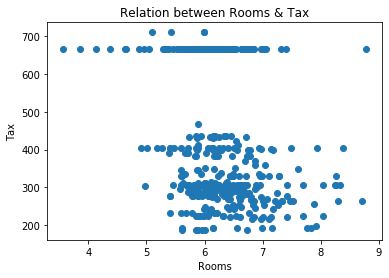

In [4]:

plt.scatter(boston['rm'], boston['tax'])
plt.title("Relation between Rooms & Tax")
plt.xlabel("Rooms")
plt.ylabel("Tax")
plt.show()

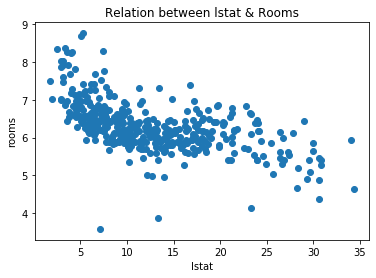

In [5]:
plt.scatter(boston['lstat'], boston['rm'])
plt.title("Relation between lstat & Rooms")
plt.xlabel("lstat")
plt.ylabel("rooms")
plt.show()

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [ ]:
# Your response here

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

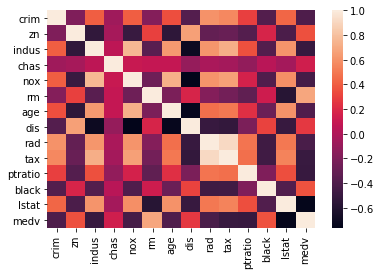

In [6]:
import seaborn as sns
sns.heatmap(boston.corr())

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [7]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [8]:
#Calculates and returns the performance score between 
#true and predicted values based on the metric chosen.

from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
   score = r2_score(y_true,y_predict)
   return score

    # Your code here:

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [9]:
from sklearn.model_selection import train_test_split

cols = [col for col in boston.columns.values if col not in ['medv']]
X = boston[cols]
y = boston['medv']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, shuffle=True)


----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [10]:
# Five separate RFR here with the given max depths
from sklearn.ensemble import RandomForestRegressor

tree_two_model = RandomForestRegressor(max_depth=2).fit(train_X, train_y)
tree_four_model = RandomForestRegressor(max_depth=4).fit(train_X, train_y)
tree_six_model = RandomForestRegressor(max_depth=6).fit(train_X, train_y)
tree_eight_model = RandomForestRegressor(max_depth=8).fit(train_X, train_y)
tree_ten_model = RandomForestRegressor(max_depth=10).fit(train_X, train_y)

Now, plot the score for each tree on the training set and on the testing set.

In [11]:

y_pred_two = tree_two_model.predict(test_X)
y_pred_four = tree_four_model.predict(test_X)
y_pred_six = tree_six_model.predict(test_X)
y_pred_eight = tree_eight_model.predict(test_X)
y_pred_ten = tree_ten_model.predict(test_X)



In [12]:
print(performance_metric(test_y, y_pred_two))
print(performance_metric(test_y, y_pred_four))
print(performance_metric(test_y, y_pred_six))
print(performance_metric(test_y, y_pred_eight))
print(performance_metric(test_y, y_pred_ten))

0.803343002637318
0.8236326020867446
0.853579399568978
0.8488707831776817
0.8535897030440633


In [42]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(test_y, y_pred_two))
print(mean_squared_error(test_y, y_pred_four))
print(mean_squared_error(test_y, y_pred_six))
print(mean_squared_error(test_y, y_pred_eight))
print(mean_squared_error(test_y, y_pred_ten))

38.02209959722552
28.580720069100295
28.440543038057026
27.234407186594378
27.417550891786096


In [13]:
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(test_y, y_pred_two))
print(mean_absolute_error(test_y, y_pred_four))
print(mean_absolute_error(test_y, y_pred_six))
print(mean_absolute_error(test_y, y_pred_eight))
print(mean_absolute_error(test_y, y_pred_ten))

2.9779982375927063
2.567078042600553
2.359135820292715
2.345977274273594
2.313200848839444


What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [ ]:
# These test says that the best depths are eight or ten. 

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [21]:
from mlxtend.evaluate import bias_variance_decomp
from sklearn.metrics import mean_squared_error
from math import sqrt

# Calcultate from max depth 1: 
tree_one_model = RandomForestRegressor(max_depth=1).fit(train_X, train_y)

# Predictions with this model: 
y_pred_one = tree_one_model.predict(test_X)
# Calculate the Bias-Variance Tradeoff
var_one_model = np.var(y_pred_one)
var_ten_model = np.var(y_pred_ten)

mse = sqrt(mean_squared_error(test_y, y_pred_one))
mse_ten = sqrt(mean_squared_error(test_y, y_pred_ten))

print("Tree with one depth "+str(var_one_model))
print("Tree with ten depth "+str(var_ten_model))
print("*"*79)
print("Tree with one depth Bias "+str(mse))
print("Tree with ten depth Bias "+str(mse_ten))


Tree with one depth 23.713803105063374
Tree with ten depth 64.87089492093453
*******************************************************************************
Tree with one depth Bias 5.412098502160041
Tree with ten depth Bias 3.267456962948021


### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
# Your response here